In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp
sns.set()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import os


from sklearn.metrics import accuracy_score

# ML algoritms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb



# Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.shape

(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


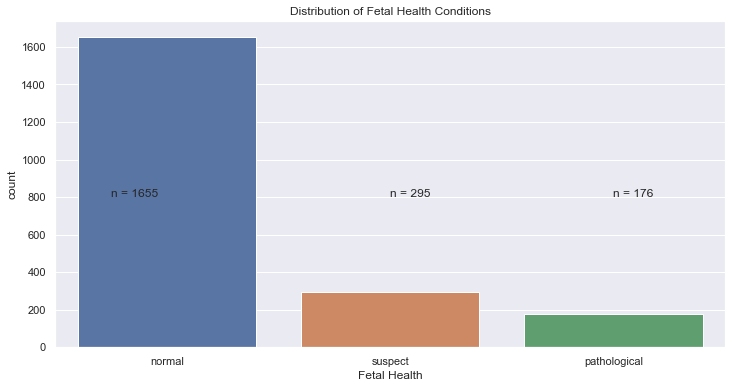

In [7]:
# Plot fetal health with box plots, and present actual counts on each box. 
labels = ['normal',
         'suspect',
         'pathological']
fig, ax = plt.subplots(figsize=(12,6))
_ = sns.countplot(df.fetal_health)
_ = ax.set_xlabel('Fetal Health')
_ = ax.set_xticklabels(labels)
_ = plt.title('Distribution of Fetal Health Conditions')
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[1]}", x = -0.25, y = 800)
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[2]}", x = 1, y = 800)
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[3]}", x = 2, y = 800)

<AxesSubplot:>

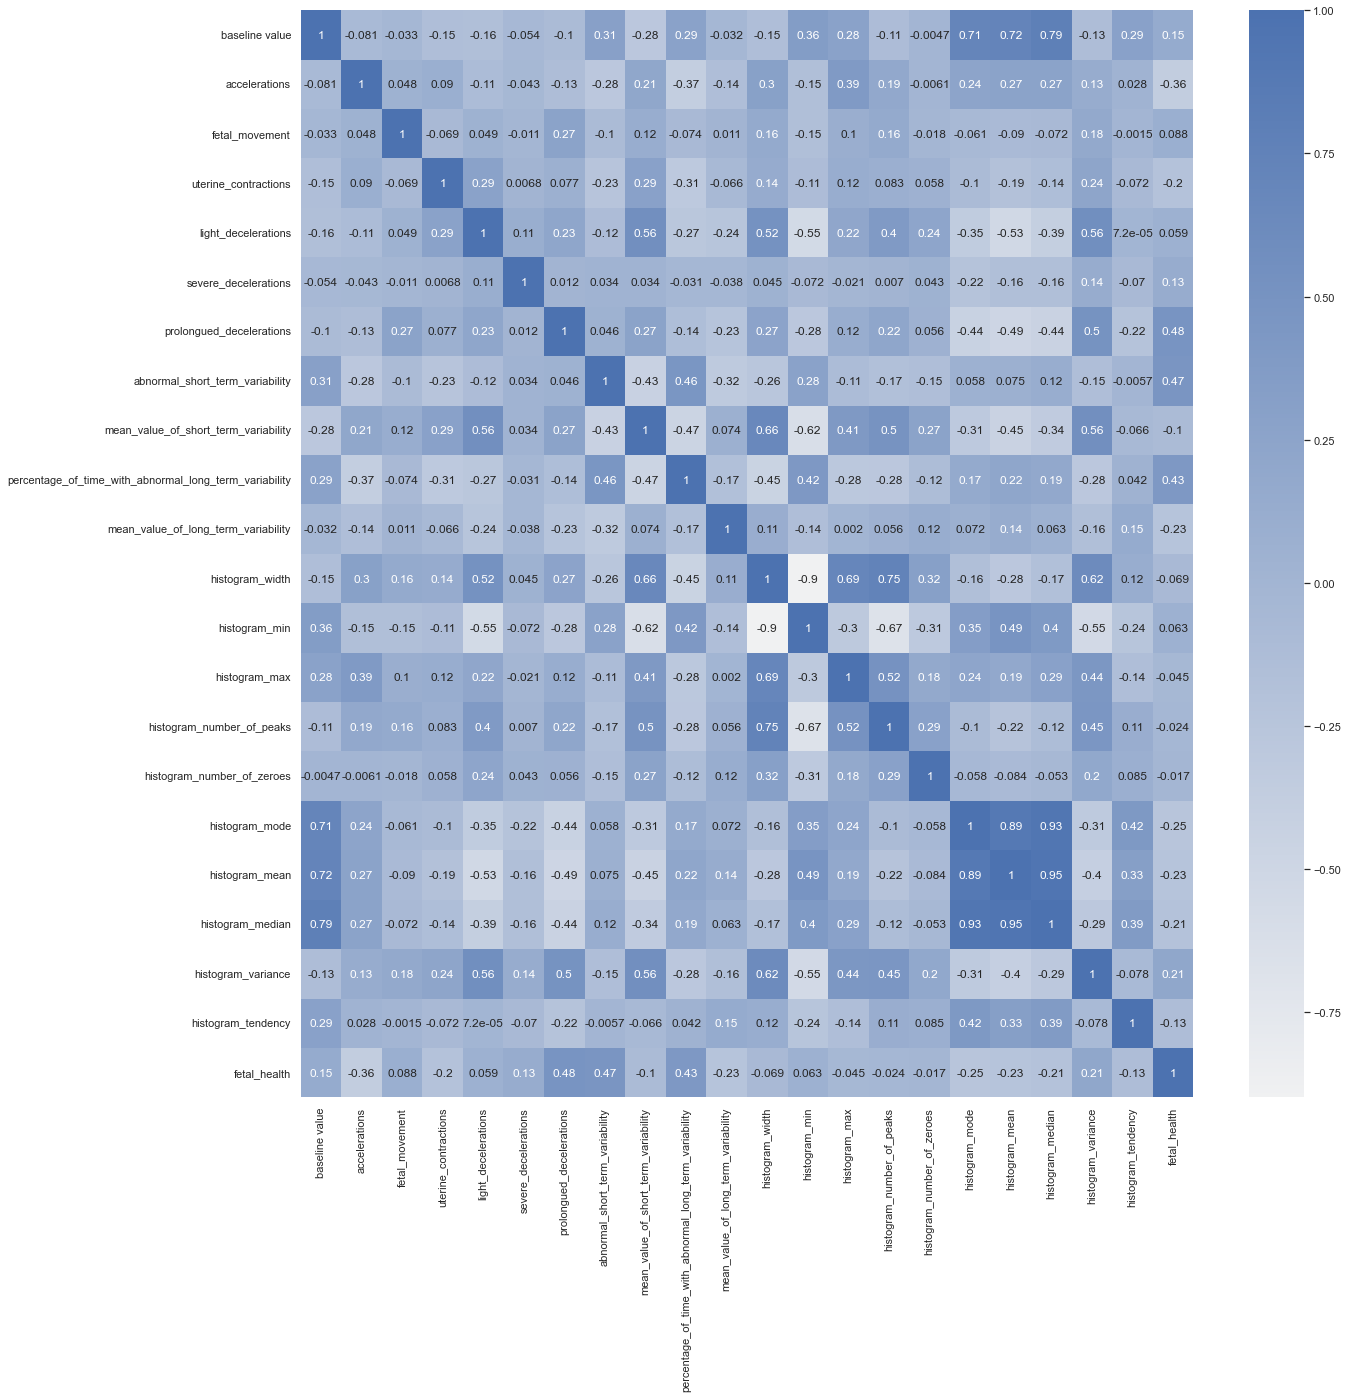

In [8]:
plt.figure(figsize=(20,20))
corr = df.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

In [9]:
def getall_visuals(data,column,xlabel, bins = 50):
    """ This function plots histograms for 3 different fetal health classes
    and one for all data. 
    
    Column name should be str.
    """
    fig = plt.figure(figsize=(12, 10))

    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    sub1 = fig.add_subplot(2,3,1) # two rows, two columns, fist cell


    # Create second axes, the top-left plot with orange plot
    sub2 = fig.add_subplot(2,3,2) 

    #third ax, top right
    sub3 = fig.add_subplot(2,3,3) 

    # Create forth ax
    sub4 = fig.add_subplot(2,2,(3,4)) 

    sns.histplot(data[data['fetal_health']==1][column] , ax=sub1, color = 'g')
    sns.histplot(data[data['fetal_health']==2][column] , ax=sub2, color = 'r')
    sns.histplot(data[data['fetal_health']==3][column] , ax=sub3, color = 'y')
    
    sub1.set_xlabel(xlabel + ' of Normal')
    sub2.set_xlabel(xlabel + ' of Suspicious')
    sub3.set_xlabel(xlabel + ' of Pathological')
    sub4.set_xlabel(xlabel + ' of All')
    
    
    sns.histplot(data[column] , ax=sub4, bins=bins)

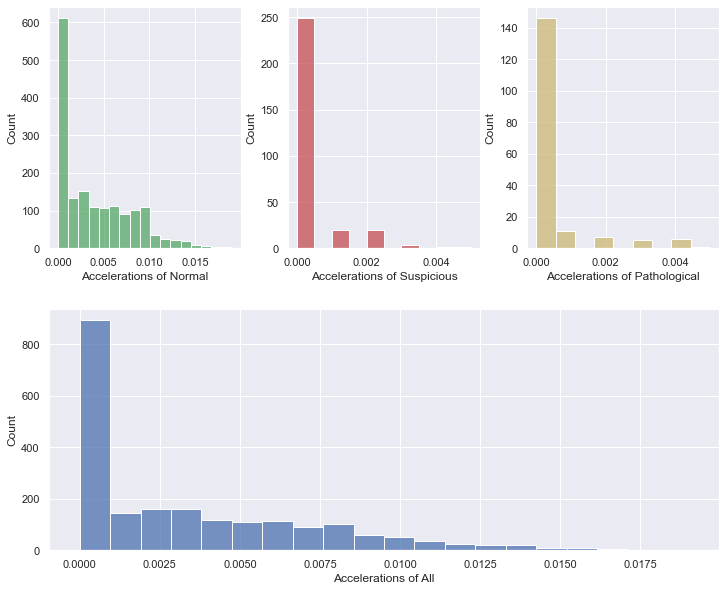

In [10]:
getall_visuals(df, 'accelerations', 'Accelerations', 20 )

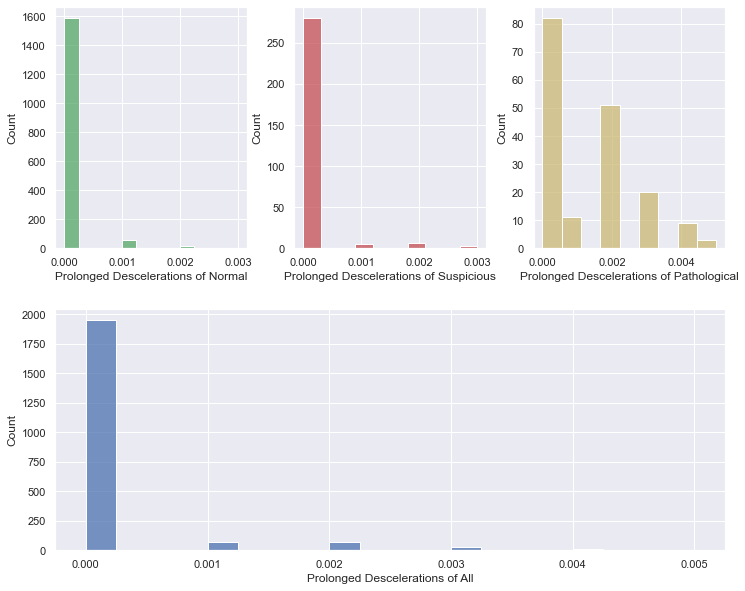

In [11]:
getall_visuals(df, 'prolongued_decelerations', 'Prolonged Descelerations', 20 )

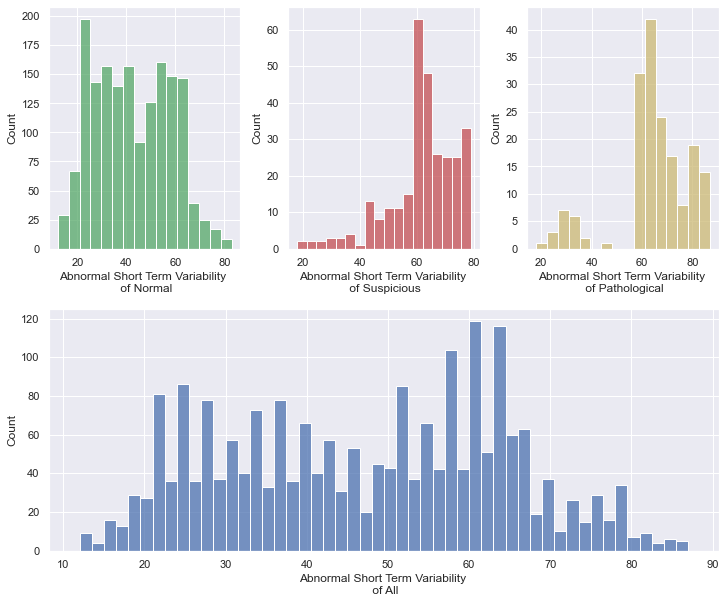

In [12]:
getall_visuals(df, 'abnormal_short_term_variability', 'Abnormal Short Term Variability \n', 50)

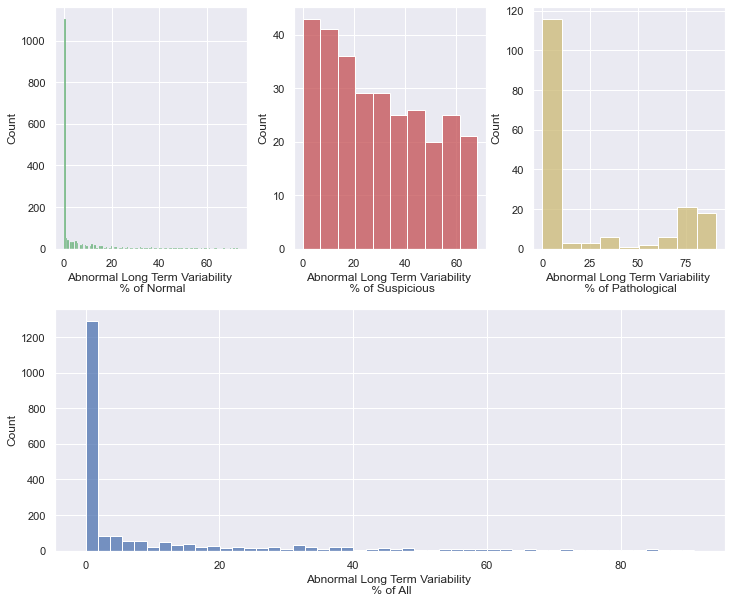

In [13]:
getall_visuals(df,'percentage_of_time_with_abnormal_long_term_variability', 'Abnormal Long Term Variability \n %', 50)

In [14]:
from scipy.stats import kruskal, mannwhitneyu

In [15]:
normal = df[df['fetal_health']==1]
suspicious = df[df['fetal_health']==2]
pathological = df[df['fetal_health']==3]

In [16]:
for x in df.columns:
    print(f"p values comparing fetal health for {x} : {kruskal(normal[x],suspicious[x],pathological[x])[1]:.2f}")

p values comparing fetal health for baseline value : 0.00
p values comparing fetal health for accelerations : 0.00
p values comparing fetal health for fetal_movement : 0.00
p values comparing fetal health for uterine_contractions : 0.00
p values comparing fetal health for light_decelerations : 0.00
p values comparing fetal health for severe_decelerations : 0.00
p values comparing fetal health for prolongued_decelerations : 0.00
p values comparing fetal health for abnormal_short_term_variability : 0.00
p values comparing fetal health for mean_value_of_short_term_variability : 0.00
p values comparing fetal health for percentage_of_time_with_abnormal_long_term_variability : 0.00
p values comparing fetal health for mean_value_of_long_term_variability : 0.00
p values comparing fetal health for histogram_width : 0.00
p values comparing fetal health for histogram_min : 0.00
p values comparing fetal health for histogram_max : 0.01
p values comparing fetal health for histogram_number_of_peaks :

In [17]:
import scikit_posthocs as sp

for col in df.columns:
    print(col)
    display(abs(sp.posthoc_dunn([normal[col], suspicious[col],pathological[col]], p_adjust = 'bonferroni')))
    print('*'*50)

baseline value


,1,2,3
1,1.000000e+00,2.057198e-55,1.000000e+00
2,2.057198e-55,1.000000e+00,2.260698e-27
3,1.000000e+00,2.260698e-27,1.000000e+00


**************************************************
accelerations


,1,2,3
1,1.000000e+00,4.967537e-70,5.456222e-42
2,4.967537e-70,1.000000e+00,1.000000e+00
3,5.456222e-42,1.000000e+00,1.000000e+00


**************************************************
fetal_movement


,1,2,3
1,1.000000,0.000118,0.000488
2,0.000118,1.000000,1.000000
3,0.000488,1.000000,1.000000


**************************************************
uterine_contractions


,1,2,3
1,1.000000e+00,5.161816e-37,0.000004
2,5.161816e-37,1.000000e+00,0.000023
3,4.272909e-06,2.269245e-05,1.000000


**************************************************
light_decelerations


,1,2,3
1,1.000000e+00,5.438087e-17,1.902072e-07
2,5.438087e-17,1.000000e+00,1.035217e-23
3,1.902072e-07,1.035217e-23,1.000000e+00


**************************************************
severe_decelerations


,1,2,3
1,1.000000e+00,1.000000e+00,5.078364e-13
2,1.000000e+00,1.000000e+00,1.258639e-09
3,5.078364e-13,1.258639e-09,1.000000e+00


**************************************************
prolongued_decelerations


,1,2,3
1,1.000000e+00,1.000000e+00,1.985610e-117
2,1.000000e+00,1.000000e+00,1.946195e-78
3,1.985610e-117,1.946195e-78,1.000000e+00


**************************************************
abnormal_short_term_variability


,1,2,3
1,1.000000e+00,1.158088e-74,3.626586e-58
2,1.158088e-74,1.000000e+00,6.119988e-01
3,3.626586e-58,6.119988e-01,1.000000e+00


**************************************************
mean_value_of_short_term_variability


,1,2,3
1,1.000000e+00,2.786190e-84,1.000000e+00
2,2.786190e-84,1.000000e+00,1.455971e-34
3,1.000000e+00,1.455971e-34,1.000000e+00


**************************************************
percentage_of_time_with_abnormal_long_term_variability


,1,2,3
1,1.000000e+00,8.938789e-109,3.549017e-05
2,8.938789e-109,1.000000e+00,4.298004e-28
3,3.549017e-05,4.298004e-28,1.000000e+00


**************************************************
mean_value_of_long_term_variability


,1,2,3
1,1.000000e+00,7.654084e-01,2.188068e-37
2,7.654084e-01,1.000000e+00,7.399276e-23
3,2.188068e-37,7.399276e-23,1.000000e+00


**************************************************
histogram_width


,1,2,3
1,1.000000e+00,8.927139e-28,1.000000e+00
2,8.927139e-28,1.000000e+00,3.535021e-15
3,1.000000e+00,3.535021e-15,1.000000e+00


**************************************************
histogram_min


,1,2,3
1,1.000000e+00,8.167960e-32,3.053079e-03
2,8.167960e-32,1.000000e+00,1.051418e-25
3,3.053079e-03,1.051418e-25,1.000000e+00


**************************************************
histogram_max


,1,2,3
1,1.000000,0.066625,0.093338
2,0.066625,1.000000,1.000000
3,0.093338,1.000000,1.000000


**************************************************
histogram_number_of_peaks


,1,2,3
1,1.000000e+00,3.239671e-09,1.000000
2,3.239671e-09,1.000000e+00,0.000023
3,1.000000e+00,2.268289e-05,1.000000


**************************************************
histogram_number_of_zeroes


,1,2,3
1,1.000000,0.001681,1.00000
2,0.001681,1.000000,0.05076
3,1.000000,0.050760,1.00000


**************************************************
histogram_mode


,1,2,3
1,1.000000e+00,1.153286e-25,1.971281e-28
2,1.153286e-25,1.000000e+00,2.702951e-59
3,1.971281e-28,2.702951e-59,1.000000e+00


**************************************************
histogram_mean


,1,2,3
1,1.000000e+00,2.739411e-32,2.262115e-28
2,2.739411e-32,1.000000e+00,9.774027e-66
3,2.262115e-28,9.774027e-66,1.000000e+00


**************************************************
histogram_median


,1,2,3
1,1.000000e+00,2.856255e-28,1.282955e-30
2,2.856255e-28,1.000000e+00,1.353311e-64
3,1.282955e-30,1.353311e-64,1.000000e+00


**************************************************
histogram_variance


,1,2,3
1,1.000000e+00,4.830842e-47,3.118093e-02
2,4.830842e-47,1.000000e+00,2.346908e-31
3,3.118093e-02,2.346908e-31,1.000000e+00


**************************************************
histogram_tendency


,1,2,3
1,1.000000e+00,3.630379e-02,3.967148e-14
2,3.630379e-02,1.000000e+00,1.980889e-15
3,3.967148e-14,1.980889e-15,1.000000e+00


**************************************************
fetal_health


,1,2,3
1,1.000000e+00,4.054968e-263,9.897264e-258
2,4.054968e-263,1.000000e+00,8.146514e-08
3,9.897264e-258,8.146514e-08,1.000000e+00


**************************************************


In [18]:
# Visualize distributions of features
def bayesian_dist(column, data):
    """this function gets column name (str) and dataframe (str), 
    returns distribution plot of the column, skewness and kurtosis"""
    sns.distplot(data[column])
    plt.title(x)
    plt.show()
    plt.show()
    print('skewness: ', stats.skew(data[column]))
    print('kurtosis: ', stats.kurtosis(data[column]))
    

def normal_visual(column, df):
    """This function gets column and dataframe as str.
    Return 
    Shapiro Wilk test and Kolmogorov-Smirnov test results,
    distplot, skewness and kurtosis of the column
    """
    bayesian_dist(column, df)
    print('*'* 30)
    print(column, 'Shapiro-Wilk test t score: ', "{:.2f}".format(stats.shapiro(df[x])[0]))
    print(column, 'Shapiro-Wilk test p value: ', "{:.2f}".format(stats.shapiro(df[x])[1]))
    print('*'*30)
    print(column, 'Kolmogorov-Smirnov t score: ', "{:.2f}".format(stats.kstest(df[x],'norm', args=(df[x].mean(),
                                                                                                   df[x].std()))[0]))
    print(column, 'Kolmogorov-Smirnov t score: ', "{:.2f}".format(stats.kstest(df[x],'norm', args=(df[x].mean(),
                                                                                                   df[x].std()))[1]))
    

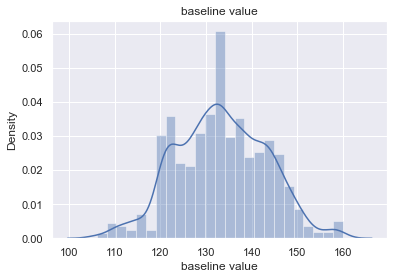

skewness:  0.020297854871183345
kurtosis:  -0.2950752858540011
******************************
baseline value Shapiro-Wilk test t score:  0.99
baseline value Shapiro-Wilk test p value:  0.00
******************************
baseline value Kolmogorov-Smirnov t score:  0.04
baseline value Kolmogorov-Smirnov t score:  0.00


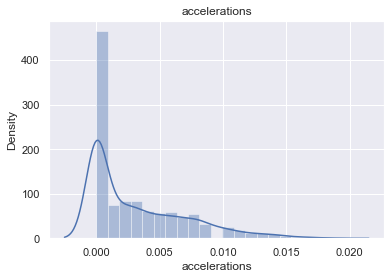

skewness:  1.203542153070066
kurtosis:  0.7630231927557718
******************************
accelerations Shapiro-Wilk test t score:  0.81
accelerations Shapiro-Wilk test p value:  0.00
******************************
accelerations Kolmogorov-Smirnov t score:  0.22
accelerations Kolmogorov-Smirnov t score:  0.00


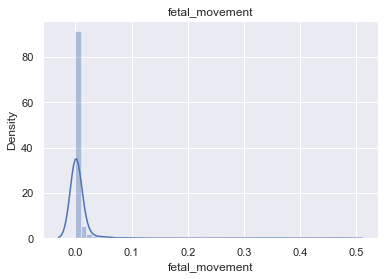

skewness:  7.805964765023443
kurtosis:  64.10696843281114
******************************
fetal_movement Shapiro-Wilk test t score:  0.19
fetal_movement Shapiro-Wilk test p value:  0.00
******************************
fetal_movement Kolmogorov-Smirnov t score:  0.42
fetal_movement Kolmogorov-Smirnov t score:  0.00


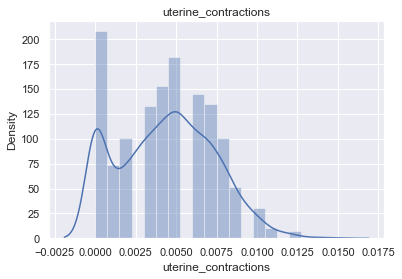

skewness:  0.1592021195935797
kurtosis:  -0.6363995037384913
******************************
uterine_contractions Shapiro-Wilk test t score:  0.96
uterine_contractions Shapiro-Wilk test p value:  0.00
******************************
uterine_contractions Kolmogorov-Smirnov t score:  0.09
uterine_contractions Kolmogorov-Smirnov t score:  0.00


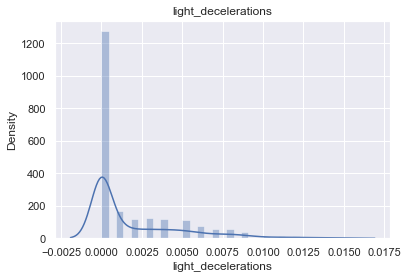

skewness:  1.7172241762866713
kurtosis:  2.5087232294878286
******************************
light_decelerations Shapiro-Wilk test t score:  0.70
light_decelerations Shapiro-Wilk test p value:  0.00
******************************
light_decelerations Kolmogorov-Smirnov t score:  0.32
light_decelerations Kolmogorov-Smirnov t score:  0.00


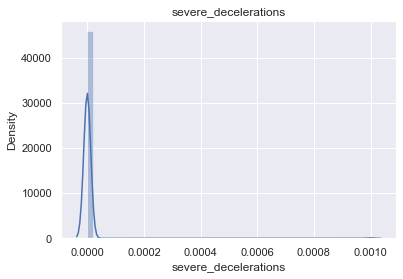

skewness:  17.341210717804756
kurtosis:  298.71758915930667
******************************
severe_decelerations Shapiro-Wilk test t score:  0.03
severe_decelerations Shapiro-Wilk test p value:  0.00
******************************
severe_decelerations Kolmogorov-Smirnov t score:  0.52
severe_decelerations Kolmogorov-Smirnov t score:  0.00


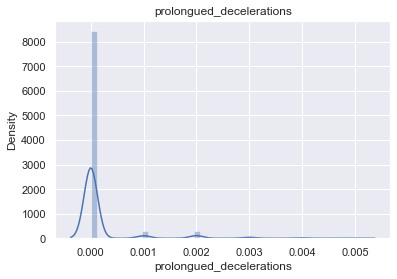

skewness:  4.320913737569469
kurtosis:  20.464878647562454
******************************
prolongued_decelerations Shapiro-Wilk test t score:  0.30
prolongued_decelerations Shapiro-Wilk test p value:  0.00
******************************
prolongued_decelerations Kolmogorov-Smirnov t score:  0.52
prolongued_decelerations Kolmogorov-Smirnov t score:  0.00


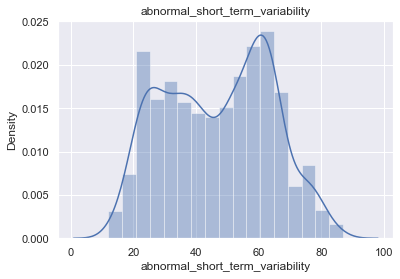

skewness:  -0.01182022892360217
kurtosis:  -1.0513802274785775
******************************
abnormal_short_term_variability Shapiro-Wilk test t score:  0.97
abnormal_short_term_variability Shapiro-Wilk test p value:  0.00
******************************
abnormal_short_term_variability Kolmogorov-Smirnov t score:  0.08
abnormal_short_term_variability Kolmogorov-Smirnov t score:  0.00


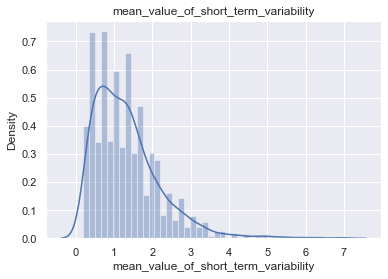

skewness:  1.6561696383216045
kurtosis:  4.686887344649029
******************************
mean_value_of_short_term_variability Shapiro-Wilk test t score:  0.88
mean_value_of_short_term_variability Shapiro-Wilk test p value:  0.00
******************************
mean_value_of_short_term_variability Kolmogorov-Smirnov t score:  0.11
mean_value_of_short_term_variability Kolmogorov-Smirnov t score:  0.00


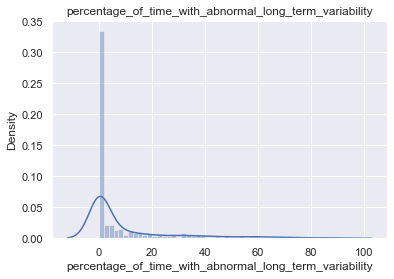

skewness:  2.19352626885173
kurtosis:  4.2401812160463725
******************************
percentage_of_time_with_abnormal_long_term_variability Shapiro-Wilk test t score:  0.61
percentage_of_time_with_abnormal_long_term_variability Shapiro-Wilk test p value:  0.00
******************************
percentage_of_time_with_abnormal_long_term_variability Kolmogorov-Smirnov t score:  0.30
percentage_of_time_with_abnormal_long_term_variability Kolmogorov-Smirnov t score:  0.00


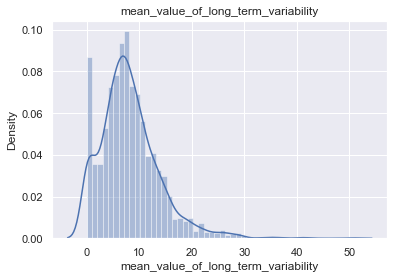

skewness:  1.3310579325954903
kurtosis:  4.118723344363613
******************************
mean_value_of_long_term_variability Shapiro-Wilk test t score:  0.92
mean_value_of_long_term_variability Shapiro-Wilk test p value:  0.00
******************************
mean_value_of_long_term_variability Kolmogorov-Smirnov t score:  0.08
mean_value_of_long_term_variability Kolmogorov-Smirnov t score:  0.00


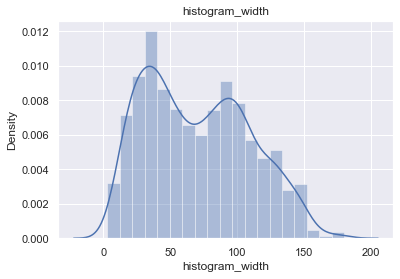

skewness:  0.3140130006787781
kurtosis:  -0.9029870215904912
******************************
histogram_width Shapiro-Wilk test t score:  0.96
histogram_width Shapiro-Wilk test p value:  0.00
******************************
histogram_width Kolmogorov-Smirnov t score:  0.09
histogram_width Kolmogorov-Smirnov t score:  0.00


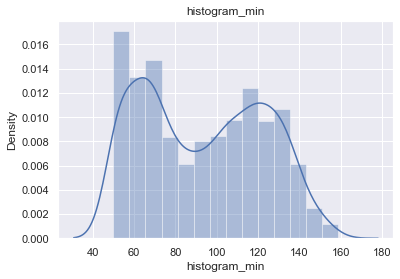

skewness:  0.11570231367169301
kurtosis:  -1.2902102107721183
******************************
histogram_min Shapiro-Wilk test t score:  0.94
histogram_min Shapiro-Wilk test p value:  0.00
******************************
histogram_min Kolmogorov-Smirnov t score:  0.11
histogram_min Kolmogorov-Smirnov t score:  0.00


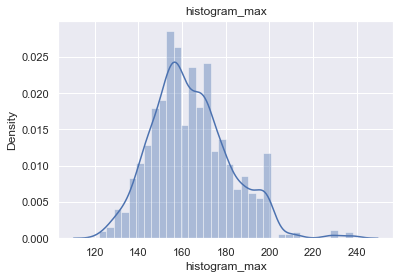

skewness:  0.5774546572229547
kurtosis:  0.6284614137962805
******************************
histogram_max Shapiro-Wilk test t score:  0.98
histogram_max Shapiro-Wilk test p value:  0.00
******************************
histogram_max Kolmogorov-Smirnov t score:  0.07
histogram_max Kolmogorov-Smirnov t score:  0.00


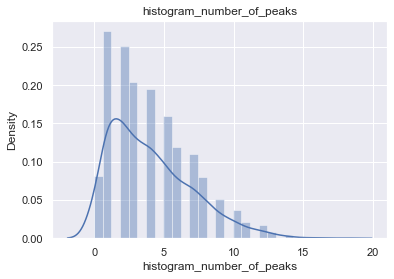

skewness:  0.892255814436207
kurtosis:  0.5002046126880981
******************************
histogram_number_of_peaks Shapiro-Wilk test t score:  0.93
histogram_number_of_peaks Shapiro-Wilk test p value:  0.00
******************************
histogram_number_of_peaks Kolmogorov-Smirnov t score:  0.14
histogram_number_of_peaks Kolmogorov-Smirnov t score:  0.00


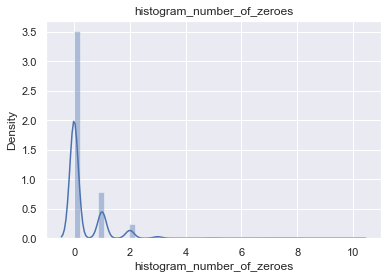

skewness:  3.91752086900489
kurtosis:  30.29089664975725
******************************
histogram_number_of_zeroes Shapiro-Wilk test t score:  0.50
histogram_number_of_zeroes Shapiro-Wilk test p value:  0.00
******************************
histogram_number_of_zeroes Kolmogorov-Smirnov t score:  0.44
histogram_number_of_zeroes Kolmogorov-Smirnov t score:  0.00


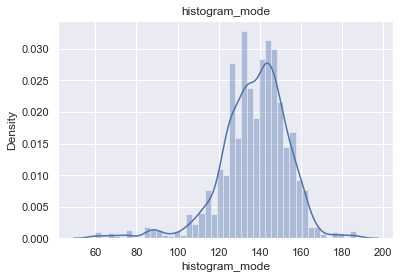

skewness:  -0.9944755592025584
kurtosis:  2.999636380197451
******************************
histogram_mode Shapiro-Wilk test t score:  0.95
histogram_mode Shapiro-Wilk test p value:  0.00
******************************
histogram_mode Kolmogorov-Smirnov t score:  0.08
histogram_mode Kolmogorov-Smirnov t score:  0.00


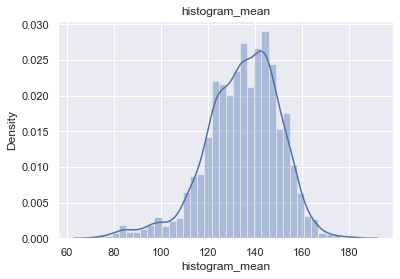

skewness:  -0.6505598243790086
kurtosis:  0.9284127911754778
******************************
histogram_mean Shapiro-Wilk test t score:  0.98
histogram_mean Shapiro-Wilk test p value:  0.00
******************************
histogram_mean Kolmogorov-Smirnov t score:  0.05
histogram_mean Kolmogorov-Smirnov t score:  0.00


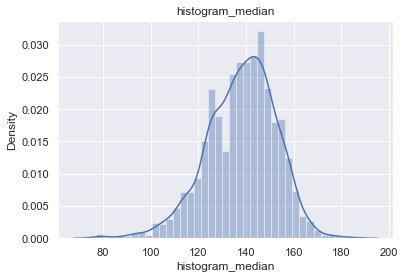

skewness:  -0.4780765865389985
kurtosis:  0.662870200582276
******************************
histogram_median Shapiro-Wilk test t score:  0.99
histogram_median Shapiro-Wilk test p value:  0.00
******************************
histogram_median Kolmogorov-Smirnov t score:  0.05
histogram_median Kolmogorov-Smirnov t score:  0.00


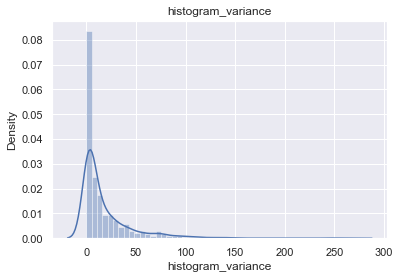

skewness:  3.2177015357863663
kurtosis:  15.093204821394817
******************************
histogram_variance Shapiro-Wilk test t score:  0.64
histogram_variance Shapiro-Wilk test p value:  0.00
******************************
histogram_variance Kolmogorov-Smirnov t score:  0.26
histogram_variance Kolmogorov-Smirnov t score:  0.00


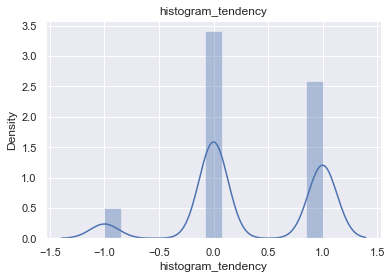

skewness:  -0.3114121871041956
kurtosis:  -0.6539257665681344
******************************
histogram_tendency Shapiro-Wilk test t score:  0.76
histogram_tendency Shapiro-Wilk test p value:  0.00
******************************
histogram_tendency Kolmogorov-Smirnov t score:  0.30
histogram_tendency Kolmogorov-Smirnov t score:  0.00


In [19]:
for x in df.columns:
    if x != 'fetal_health':
        normal_visual(x, df)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [21]:
# To use optuna for hyperparameter tuning, I need to change target values as 0,1,2. To avoid any mistakes, I will do it in the cell below.
df['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

In [22]:
# for test purposes, I'll seperate 10% of the data
unseen_data = df.sample(n=210)
remaining_data = df.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

In [23]:
remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

In [24]:
unseen_data['fetal_health'].value_counts()

0.0    162
1.0     27
2.0     21
Name: fetal_health, dtype: int64

In [25]:
remaining_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,0.0
1912,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,1.0
1913,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,1.0
1914,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,1.0


In [26]:
scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

In [27]:
scaled_data = pd.DataFrame(scaled_data , columns = df.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.346056,-0.830770,-0.196054,-1.499603,-0.639000,-0.056048,-0.268133,1.522394,-0.943732,1.809338,...,-0.168283,-1.070609,-2.110266,-0.698118,-0.455384,-1.062445,0.148675,-1.178439,1.883769,1.115620
1,-0.131770,0.722920,-0.196054,0.549053,0.392444,-0.056048,-0.268133,-1.746503,0.879730,-0.530337,...,1.527499,-0.867038,1.877180,0.651284,0.940642,0.215271,0.084891,0.128966,-0.229892,-0.522332
2,-0.030579,-0.053925,-0.196054,1.231938,0.392444,-0.056048,-0.268133,-1.804876,0.879730,-0.530337,...,1.527499,-0.867038,1.877180,0.313933,0.940642,0.215271,0.021106,-0.008655,-0.195242,-0.522332
3,0.070612,-0.053925,-0.196054,1.231938,0.392444,-0.056048,-0.268133,-1.804876,1.221629,-0.530337,...,1.193481,-1.375967,0.326506,2.338036,-0.455384,-0.028104,-0.042678,-0.077466,-0.195242,1.115620
4,-0.131770,0.981868,-0.196054,1.231938,-0.639000,-0.056048,-0.268133,-1.804876,1.221629,-0.530337,...,1.193481,-1.375967,0.326506,1.663335,-0.455384,-0.028104,0.084891,-0.008655,-0.264542,1.115620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.677755,-0.830770,-0.196054,0.207610,-0.295185,-0.056048,-0.268133,1.755886,-0.715799,0.394651,...,-1.016174,1.032962,-0.504212,-0.698118,-0.455384,0.458645,0.531383,0.473020,-0.576394,-0.522332
1912,0.677755,-0.830770,-0.196054,0.890495,-0.639000,-0.056048,-0.268133,1.872632,-1.285631,0.829939,...,-0.784931,1.474034,0.714175,-0.023417,-0.455384,0.945394,0.977875,0.954696,-0.576394,-0.522332
1913,0.677755,-0.571821,-0.196054,0.890495,-0.639000,-0.056048,-0.268133,1.814259,-1.057699,0.666706,...,-0.116895,0.320462,0.271125,0.651284,-0.455384,0.884550,0.850306,0.885885,-0.541744,1.115620
1914,0.677755,-0.571821,-0.196054,0.890495,-0.639000,-0.056048,-0.268133,1.872632,-1.057699,0.557884,...,-0.091202,0.320462,0.326506,0.313933,-0.455384,0.945394,0.850306,0.954696,-0.507093,1.115620


In [28]:
from sklearn.model_selection import train_test_split
target = remaining_data['fetal_health']
predictors = scaled_data.copy()
x_train, x_test, y_train, y_test = train_test_split(predictors,target, train_size=0.7,
                                                    random_state= 42, stratify = target.values)


display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(1341, 21)

(1341,)

(575, 21)

(575,)

In [29]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {"LR": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'ABC' : AdaBoostClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'DTC' : DecisionTreeClassifier(),
          'XGB' : XGBClassifier(early_stopping_rounds = 300)
          }

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

LR scores
0.8921739130434783
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       448
         1.0       0.68      0.60      0.64        80
         2.0       0.89      0.83      0.86        47

    accuracy                           0.89       575
   macro avg       0.83      0.79      0.81       575
weighted avg       0.89      0.89      0.89       575

[[426  21   1]
 [ 28  48   4]
 [  6   2  39]]
****************************************************************************************************
KNN scores
0.9147826086956522
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       448
         1.0       0.79      0.68      0.73        80
         2.0       0.95      0.74      0.83        47

    accuracy                           0.91       575
   macro avg       0.89      0.80      0.84       575
weighted avg       0.91      0.91      0.91       575

[[437  10   1]
 [ 25  54   1]
 [

In [30]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
7,XGB,0.949565,0.999254
5,GBC,0.947826,0.996271
3,RFC,0.939130,0.999254
6,DTC,0.937391,0.999254
2,DT,0.935652,0.999254
1,KNN,0.914783,0.933632
4,ABC,0.893913,0.869500
0,LR,0.892174,0.903057


In [31]:
target_unseen= unseen_data['fetal_health']
features_unseen = unseen_data.drop('fetal_health',axis=1)
scaled_features = ss.transform(features_unseen)

In [32]:
XGBC = XGBClassifier(early_stopping_rounds=300)
XGBC.fit(x_train, y_train)
y_pred = XGBC.predict(x_test)

[18:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
confusion_matrix(y_test,y_pred)

array([[443,   5,   0],
       [ 21,  59,   0],
       [  2,   1,  44]], dtype=int64)

<AxesSubplot:>

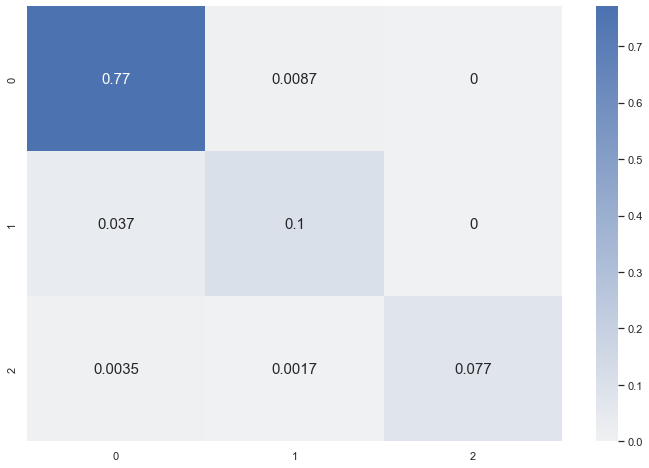

In [34]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [35]:
confusion_matrix(XGBC.predict(scaled_features), target_unseen)

array([[162,   9,   3],
       [  0,  18,   2],
       [  0,   0,  16]], dtype=int64)

<AxesSubplot:>

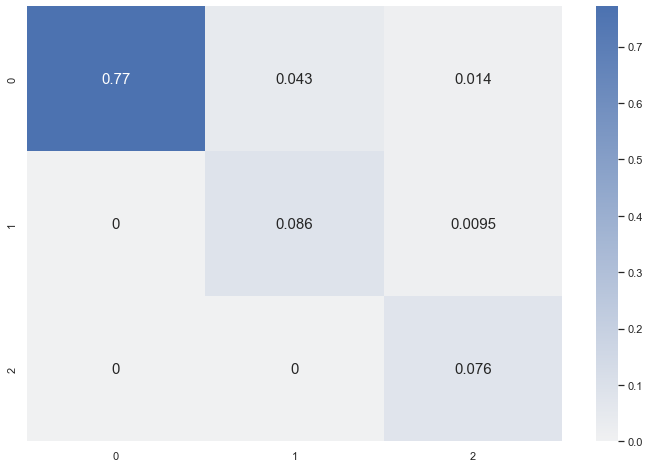

In [36]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(XGBC.predict(scaled_features), target_unseen)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [37]:
import optuna
xgbc = XGBClassifier()
def objective(trial):
    train_x, test_x, train_y, test_y = x_train, x_test, y_train, y_test
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dtest = xgb.DMatrix(test_x, label=test_y)

    list_bins = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
    param = {
        'verbosity' : 0,
        'eta' : trial.suggest_uniform('eta', 0.1, 0.8),
        'max_depth' : trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree',0.5,1.0,0.05),
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
        'subsample' : trial.suggest_discrete_uniform('subsample', 0.6, 0.9, 0.1),
        'max_bin' : trial.suggest_categorical('max_bin', list_bins),
        'objective' : 'multi:softmax',
        'num_class' : 3,
         "eval_metric": "mlogloss"
    }
         

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-mlogloss")
    bst = xgb.train(param, dtrain, early_stopping_rounds = 300, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(test_y, pred_labels)
    return accuracy

In [38]:
study = optuna.create_study()
study.optimize(objective, n_trials=2)

[I 2021-12-16 18:10:39,087] A new study created in memory with name: no-name-939ced18-35d6-4b3a-9e6f-c5fb07188842


[0]	validation-mlogloss:0.78621
[1]	validation-mlogloss:0.62903
[2]	validation-mlogloss:0.53554
[3]	validation-mlogloss:0.47429
[4]	validation-mlogloss:0.43329
[5]	validation-mlogloss:0.40499
[6]	validation-mlogloss:0.38468
[7]	validation-mlogloss:0.36980
[8]	validation-mlogloss:0.35915
[9]	validation-mlogloss:0.35078


[I 2021-12-16 18:10:39,176] Trial 0 finished with value: 0.871304347826087 and parameters: {'eta': 0.2908775481483557, 'max_depth': 6, 'colsample_bytree': 0.7, 'booster': 'gblinear', 'lambda': 0.119450246410697, 'alpha': 1.8830955919794193e-06, 'subsample': 0.9, 'max_bin': 150}. Best is trial 0 with value: 0.871304347826087.


[0]	validation-mlogloss:0.59323
[1]	validation-mlogloss:0.43478
[2]	validation-mlogloss:0.36451
[3]	validation-mlogloss:0.33398
[4]	validation-mlogloss:0.33805
[5]	validation-mlogloss:0.34170
[6]	validation-mlogloss:0.33439
[7]	validation-mlogloss:0.32697
[8]	validation-mlogloss:0.32138
[9]	validation-mlogloss:0.31629


[I 2021-12-16 18:10:39,257] Trial 1 finished with value: 0.8921739130434783 and parameters: {'eta': 0.5709372985443498, 'max_depth': 12, 'colsample_bytree': 0.8, 'booster': 'gblinear', 'lambda': 0.0005127019316627491, 'alpha': 4.0639713071856155e-05, 'subsample': 0.9, 'max_bin': 50}. Best is trial 0 with value: 0.871304347826087.


In [39]:
study.best_params

{'eta': 0.2908775481483557,
 'max_depth': 6,
 'colsample_bytree': 0.7,
 'booster': 'gblinear',
 'lambda': 0.119450246410697,
 'alpha': 1.8830955919794193e-06,
 'subsample': 0.9,
 'max_bin': 150}

In [40]:
# These parameters always changes, however I tried various option. Each of them overfit and misclassified unseen data. So I leave this one as it is. 
XGBC_new = XGBClassifier(eta= 0.345,
                    max_depth = 9,
                    colsample_bytree = 0.7,
                    booster = 'gblinear',
                    reg_lambda = 6.280816614235506e-06,
                    reg_alpha = 4.725045071821984e-08,
                    subsamle = 0.6,
                    max_bin = 250)

In [41]:
scaled_features = pd.DataFrame(scaled_features, columns = x_train.columns)

In [42]:
XGBC_new.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              enable_categorical=False, eta=0.345, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=250, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0,
              reg_alpha=4.725045071821984e-08, reg_lambda=6.280816614235506e-06,
              scale_pos_weight=None, subsamle=0.6, subsample=None,
              tree_method=None, ...)

In [43]:
# X_test prediction
y_pred = XGBC_new.predict(x_test)
confusion_matrix(y_pred, y_test)

array([[426,  27,   5],
       [ 20,  49,   2],
       [  2,   4,  40]], dtype=int64)

In [44]:
y_unseen = XGBC_new.predict(scaled_features)
confusion_matrix(y_unseen, target_unseen)

array([[152,   8,   4],
       [  8,  19,   7],
       [  2,   0,  10]], dtype=int64)

In [45]:
print(classification_report(y_unseen, target_unseen))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       164
         1.0       0.70      0.56      0.62        34
         2.0       0.48      0.83      0.61        12

    accuracy                           0.86       210
   macro avg       0.71      0.77      0.72       210
weighted avg       0.87      0.86      0.86       210



<AxesSubplot:>

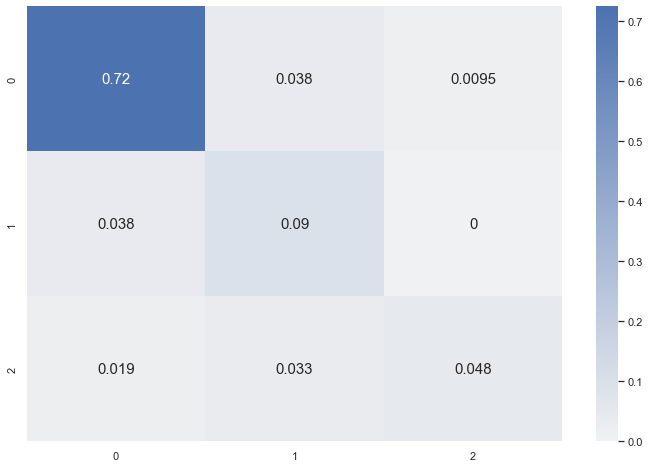

In [46]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(target_unseen, y_unseen)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})